In [9]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [16]:
# Import the dataset

movies_df = pd.read_csv("movies.csv")

In [17]:
# Let's see the first 5 rows of the data

movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [18]:
movies_df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [19]:
# Let's see the shape of the data

movie_shape = movies_df.shape
print(f'The data has {movie_shape} rows and columns respectively')

The data has (7668, 15) rows and columns respectively


In [20]:
# Let's see the 15 columns of the data

movies_df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [21]:
# Let's see the data type of each column in the data

movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Data Cleaning

In [22]:
# Let's check for null values in the data

movies_df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [23]:
# Let's see the rows with these null values

movies_df[movies_df.isnull().any(axis = 1)]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [24]:
# The rows with the null values are quite much. So let's drop them and check the shape of the data

movies_df = movies_df.dropna()
movies_df.shape

(5421, 15)

In [25]:
# Let's check for duplicate values in the data

movies_df[(movies_df.duplicated(keep = 'first'))]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


**No duplicate Values**

### Statistical insights

In [26]:
# Statistical insights for numeric features

movies_df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


**The dataset is from year 1980 to 2020**

In [27]:
# Statistical insights for non-numeric features

movies_df.describe(exclude = "number")

,name,rating,genre,released,director,writer,star,country,company
count,5421,5421,5421,5421,5421,5421,5421,5421,5421
unique,5336,10,15,2560,2063,3205,1845,50,1475
top,Hercules,R,Comedy,"August 26, 2016 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,2597,1496,7,33,32,40,4319,330


### Data Visualizations

### Task 1: Movies Budget Vs Revenue

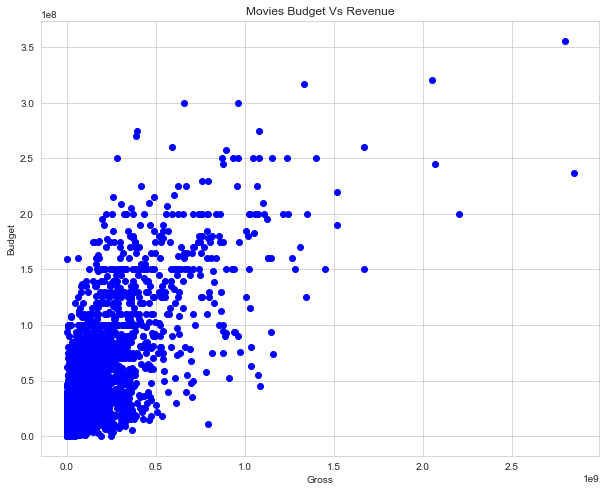

In [28]:
# Do budgets on the movies affect the revenue generated from the movies?

plt.subplots(figsize = (10, 8))
plt.scatter(x = movies_df['gross'], y = movies_df['budget'], color = 'blue')
plt.title('Movies Budget Vs Revenue')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

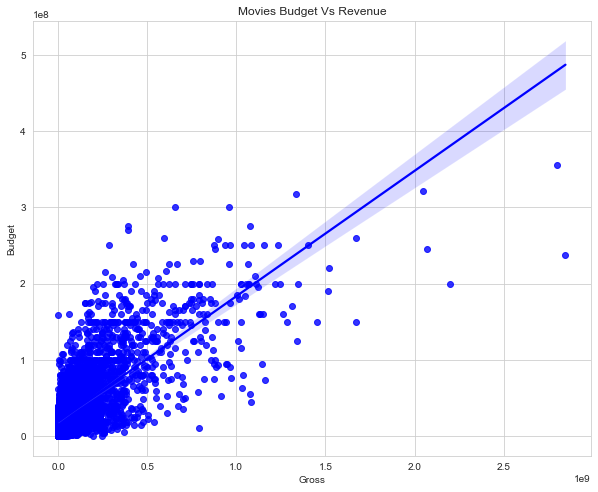

In [29]:
# Let's see the full picture with a trendline

plt.subplots(figsize = (10, 8))
sns.regplot(x = movies_df['gross'], y = movies_df['budget'], color = 'blue')
plt.title('Movies Budget Vs Revenue')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()

**There is a positive relationship between movies revenue and budget: as budget increases, revenue also increases**

### Task 2: Movies Score Vs Revenue

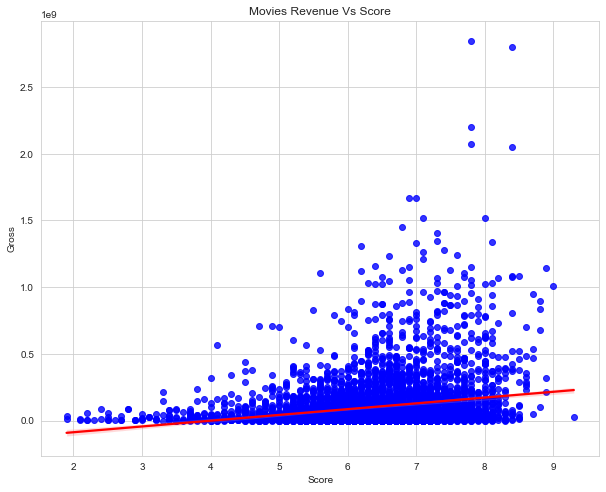

In [30]:
# Do movies' scores affect the revenue generated from the movies?

plt.subplots(figsize = (10, 8))
sns.regplot(x = movies_df['score'], y = movies_df['gross'], scatter_kws ={'color' : 'blue'}, line_kws = {'color' : 'red'} )
plt.title('Movies Revenue Vs Score')
plt.xlabel('Score')
plt.ylabel('Gross')
plt.show()

**There is a negative relationship between movies revenue and score**

### Task 3: Movies rating Vs Revenue

Text(0.5, 1.0, 'Movies rating Vs Revenue')

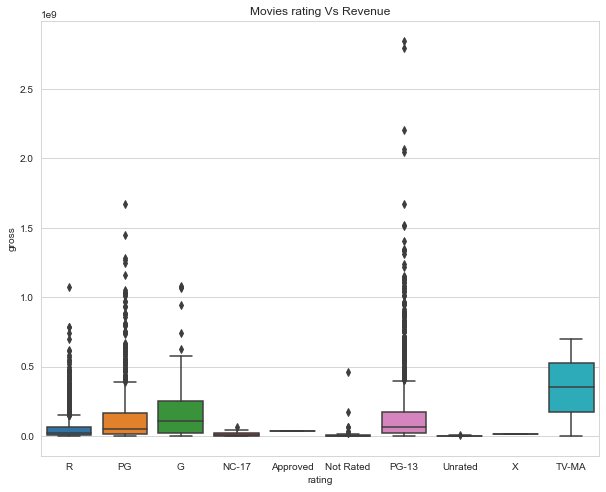

In [31]:
# Do movies rating affect the revenue generated from the movies?

plt.subplots(figsize = (10,8))
sns.boxplot(x = 'rating', y = 'gross' , data = movies_df)
plt.title('Movies rating Vs Revenue')

**As median and max value for each category is close to 0, there is no relationship between movies revenue and rating**

### Task 4: Other relationships in the data

In [32]:
# What other relationships can be shown?

movies_correlation = movies_df.corr()
movies_correlation

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


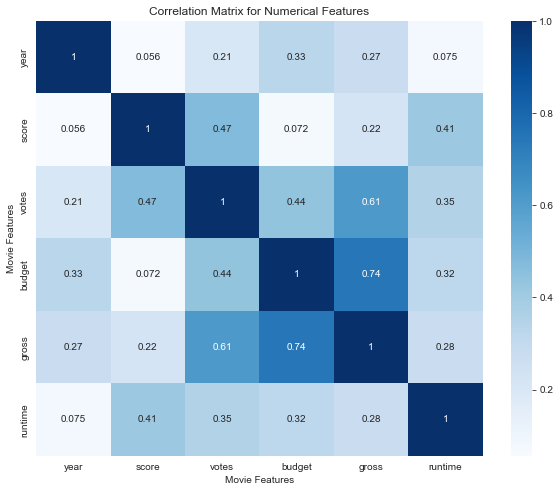

In [33]:
# Showing the relationship as a heatmap

plt.subplots(figsize = (10, 8))
sns.heatmap(movies_correlation, annot = True, cmap = 'Blues')
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

### Conclusions
* There is a positive relationship between movies revenue and budget: as budget increases, revenue also increases
* There is a negative relationship between movies revenue and score.
* There is no relationship between movies revenue and rating